# Old World + Leviathan



In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import World, analysis, default_parameters
import copy

In [2]:
def simulation(world, n_sim):
    imperial_density = []
    
    for sim in range(n_sim):
        world.reset()
        imperial_density.append(analysis.ImperialDensity(world))
        for step in range(1500):
            world.step()
            imperial_density[sim].sample()
            if (world.step_number)%100 == 0:
                print('simulation: {:2d}\tstep: {:4d}'.format(sim+1,world.step_number))
                analysis.plot_ultrasocietal_traits(world)
                #analysis.plot_polities(world)
                #LEVIATHAN
                analysis.plot_yields(world)
                #analysis.plot_depletion(world)
                analysis.plot_comfort(world)
                #analysis.plot_expectations(world)
                analysis.plot_paradigms(world)
            
    return imperial_density

simulation:  1	step:  100


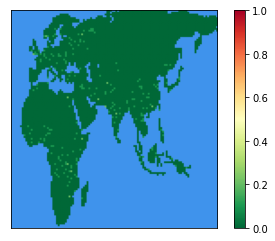

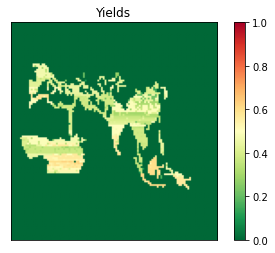

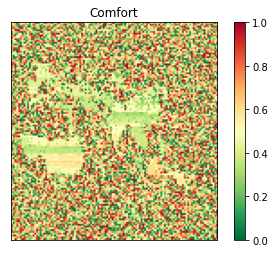

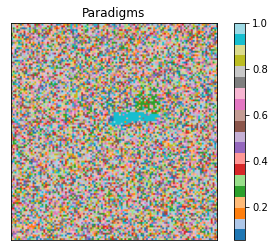

simulation:  1	step:  200


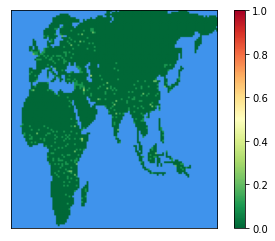

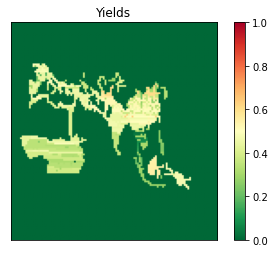

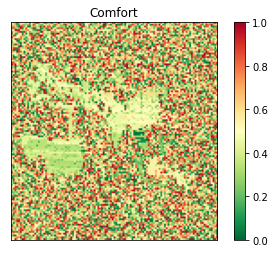

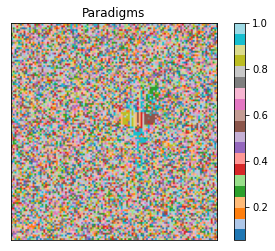

simulation:  1	step:  300


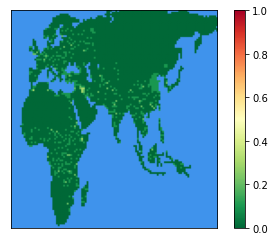

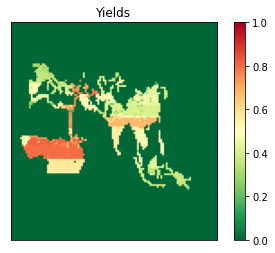

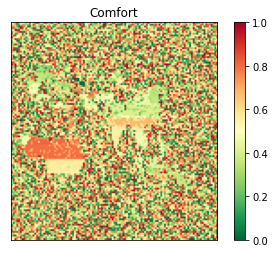

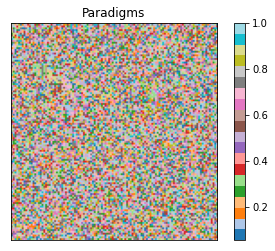

simulation:  1	step:  400


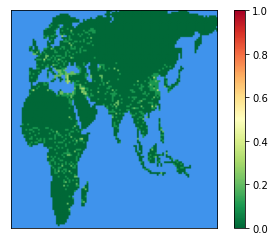

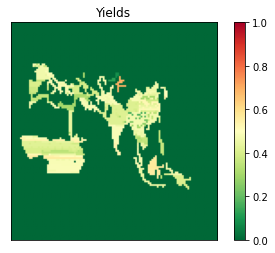

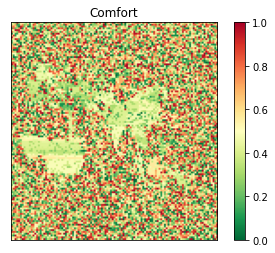

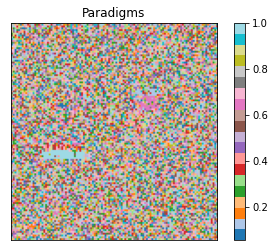

simulation:  1	step:  500


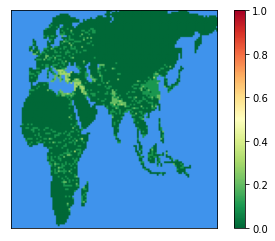

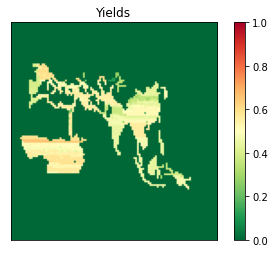

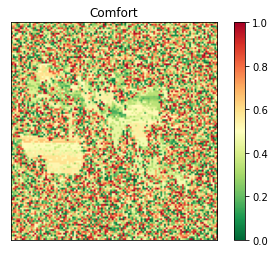

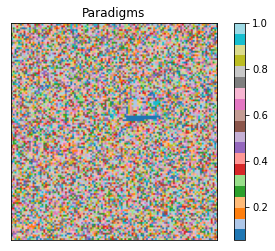

simulation:  1	step:  600


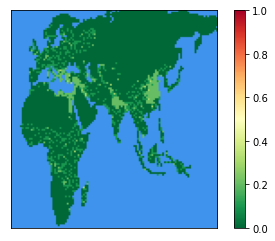

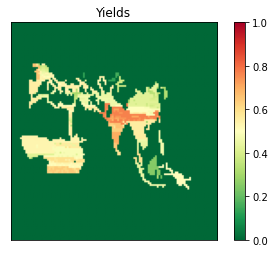

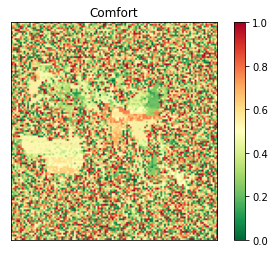

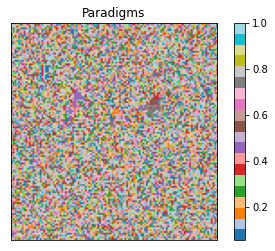

simulation:  1	step:  700


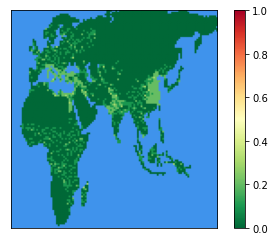

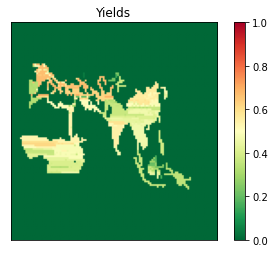

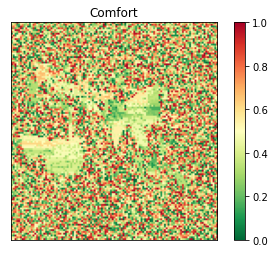

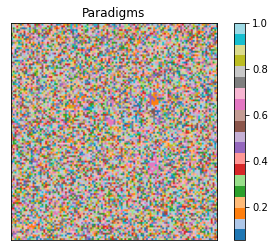

simulation:  1	step:  800


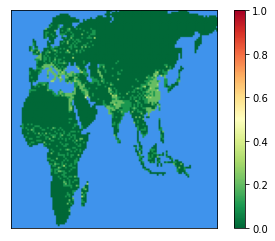

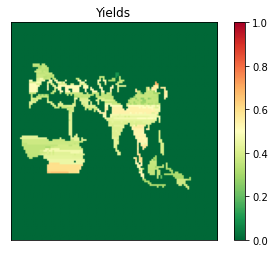

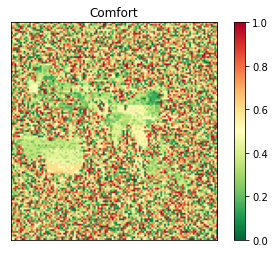

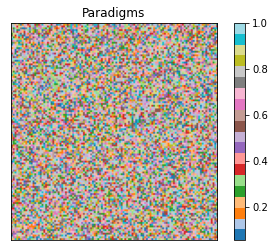

simulation:  1	step:  900


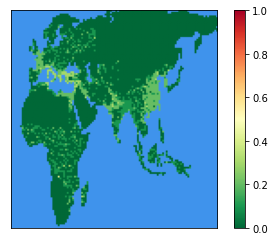

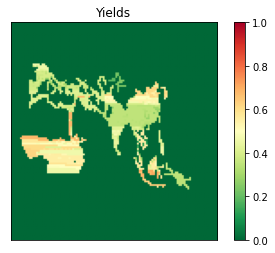

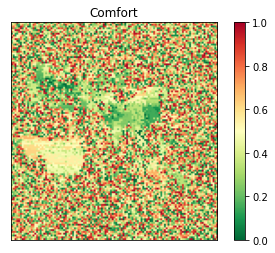

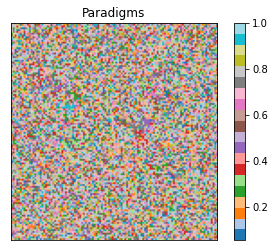

simulation:  1	step: 1000


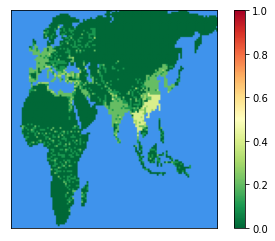

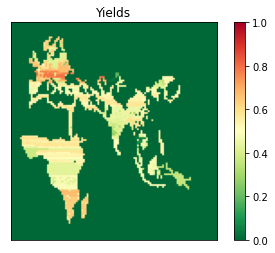

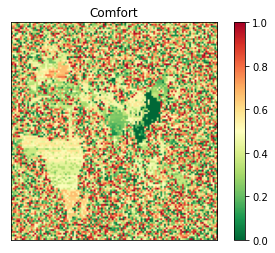

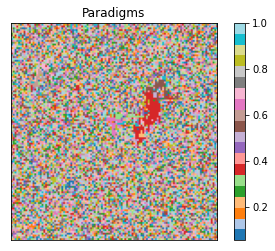

simulation:  1	step: 1100


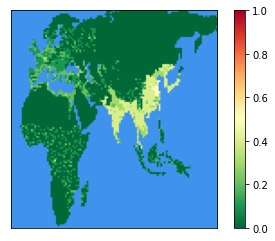

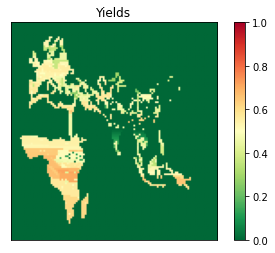

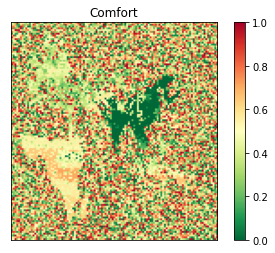

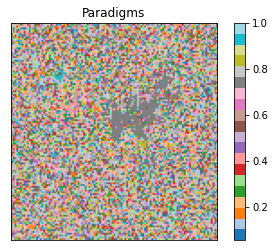

simulation:  1	step: 1200


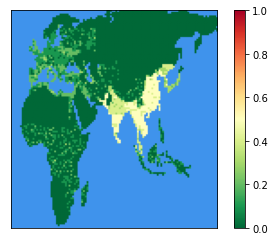

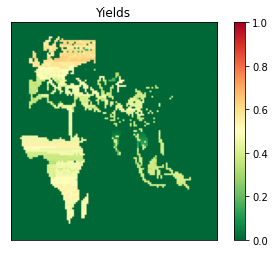

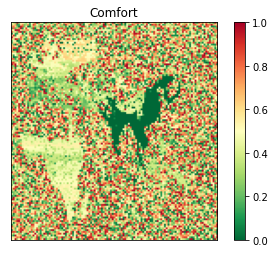

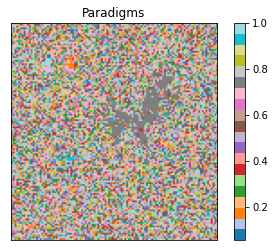

simulation:  1	step: 1300


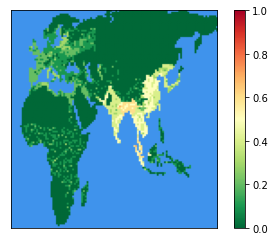

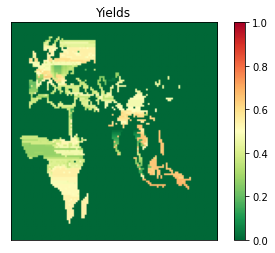

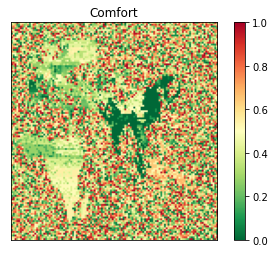

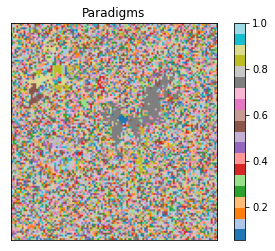

simulation:  1	step: 1400


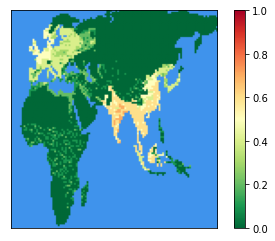

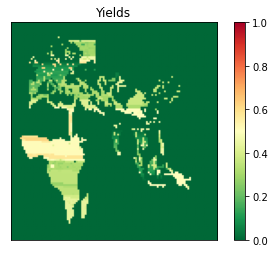

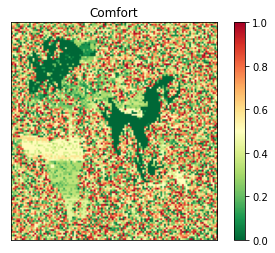

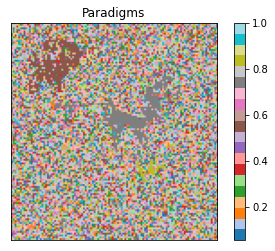

simulation:  1	step: 1500


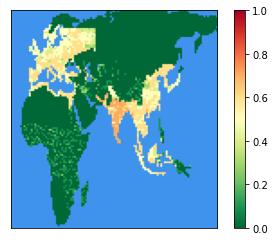

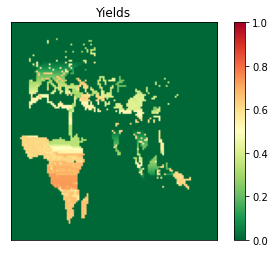

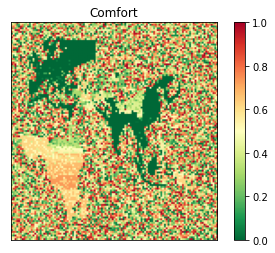

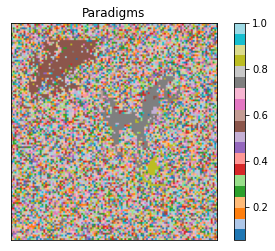

In [3]:
params = copy.deepcopy(default_parameters)

params = params._replace(spread_para_on_ethnocide=True)
params = params._replace(icono=True)
# simple contagion-style spread? 'Perfect' or 'FutureDiscounted' or None
params = params._replace(contagion='FutureDiscounted')

params = params._replace(num_icono_loops=2)
params = params._replace(workrate_change=0.1)
params = params._replace(threshold=2)
params = params._replace(mut_amount=2)
params = params._replace(mutation_rate=0.01)

world = World.from_file(project_dir+'/data/old_world.yml', params)

# Check if simulation has been run before
#if os.path.isfile('./imperial_density.pkl'):
#    mean_impd = analysis.ImperialDensity.from_file(world, './imperial_density.pkl')
#else:
imperial_density = simulation(world, 1)
mean_impd = analysis.ImperialDensity.mean(imperial_density)
mean_impd.dump('./imperial_density.pkl')

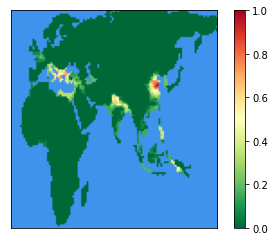

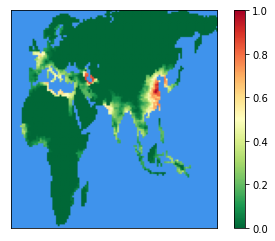

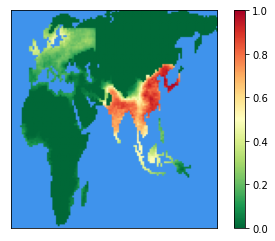

In [4]:
mean_impd.plot_all()

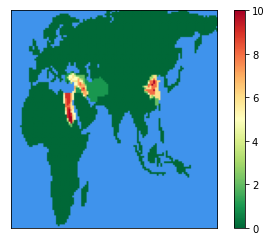

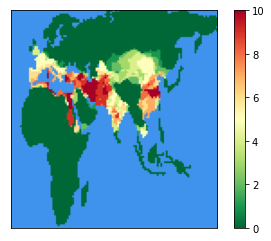

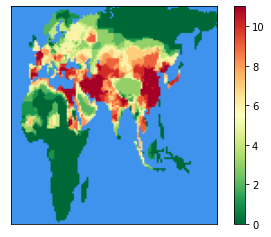

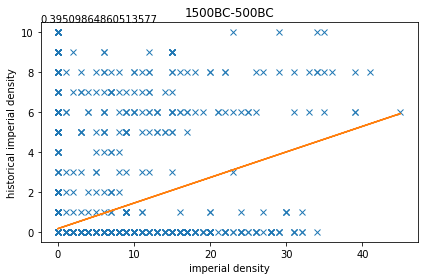

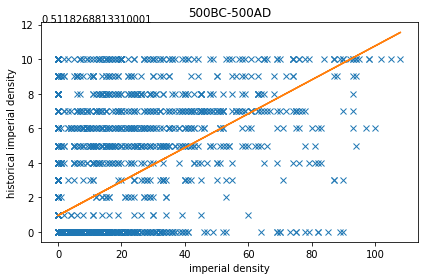

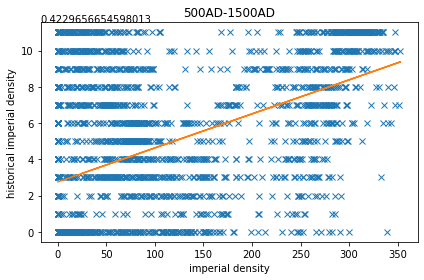

In [5]:
# Correlate with historical data
historical = analysis.HistoricalImperialDensity(world, data_file=project_dir+'/data/imperial_density_data.pkl')

historical.plot_heatmap()

historical.correlate(mean_impd)